In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit



import warnings
warnings.filterwarnings('ignore')

#### Load Spam Data

In [3]:
with open("./Data/spam.csv") as f:
    f.readline()  # skip the header
    data_reader = csv.reader(f, delimiter=",")
    X = []
    y = []
    for row in data_reader:
        features = row[1:-1]
        label = row[-1]
        X.append([float(feature) for feature in features])
        y.append(int(label))

#### Preprocess Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

#### Learning Curve Graph

In [5]:
# source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(6.4, 4.8))
        plt.grid(False)

    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        train_sizes=train_sizes,
        cv=cv
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation score"
    )
    axes.legend(loc="best")
    return plt


## Decision Tree

Prune with depth size & Cost Complexity Pruning


In [6]:
def plot_validation_curve_depth_DT(X_train, y_train, X_test, y_test):
    train_score = []
    test_score = []
    max_depth = [5,20,40,60,80,100]
    for depth in max_depth:         
        clf = DecisionTreeClassifier(max_depth=depth, random_state=10)
        clf.fit(X_train, y_train)
        test_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)
        test_score.append(f1_score(y_test, test_pred))
        train_score.append(f1_score(y_train, train_pred))
        
    
    plt.plot(max_depth, test_score, 'o-', color='g', label='Test Score')
    plt.plot(max_depth, train_score, 'o-', color = 'r', label='Training Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Max Depth')
    
    plt.title("Max Depth vs. F1 Score")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def plot_validation_curve_ccp_DT(X_train, y_train, X_test, y_test):
    train_score = []
    test_score = []
    ccp_alpha_range = np.linspace(0.01,0.035,10)
    for ccp in ccp_alpha_range:         
        clf = DecisionTreeClassifier(ccp_alpha=ccp, max_depth=20, random_state=10)
        clf.fit(X_train, y_train)
        test_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)
        test_score.append(f1_score(y_test, test_pred))
        train_score.append(f1_score(y_train, train_pred))
        
    
    plt.plot(ccp_alpha_range, test_score, 'o-', color='g', label='Test Score')
    plt.plot(ccp_alpha_range, train_score, 'o-', color = 'r', label='Training Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('CCP Alpha')
    
    plt.title("CCP_Alpha vs. F1 Score")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
     
    
def DTGridSearch(X_train, y_train):
    param_grid = {'ccp_alpha':np.linspace(0.01,0.035,10),
                  'max_depth':np.arange(1,20)}

    tree = GridSearchCV(estimator = DecisionTreeClassifier(random_state=10), param_grid=param_grid, cv=5)
    tree.fit(X_train, y_train)
    print("Best HyperParameters: ")
    print(tree.best_params_)
    return tree.best_params_['max_depth'], tree.best_params_['ccp_alpha']

#### Validation Curve

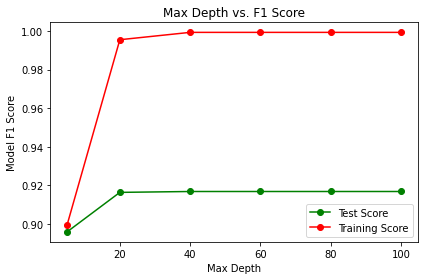

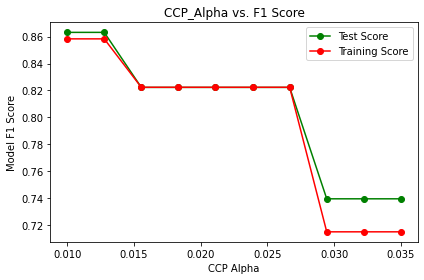

Best HyperParameters: 
{'ccp_alpha': 0.01, 'max_depth': 4}


In [7]:
plot_validation_curve_depth_DT(X_train, y_train, X_test, y_test)
plot_validation_curve_ccp_DT(X_train, y_train, X_test, y_test)
best_max_depth, best_ccp_alpha = DTGridSearch(X_train, y_train)
best_DT = DecisionTreeClassifier(max_depth=best_max_depth,ccp_alpha=best_ccp_alpha, random_state=0)

#### Learning Curve

<module 'matplotlib.pyplot' from '/Users/chasebrooks/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

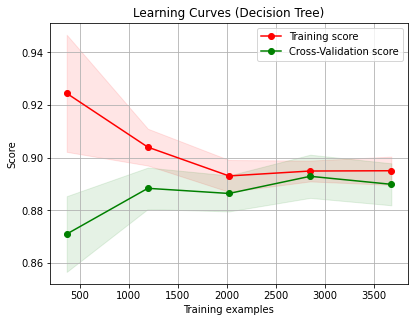

In [8]:
title = "Learning Curves (Decision Tree)"
plot_learning_curve(best_DT, title, X, y, ylim=(0.7, 1.01))

In [9]:
dt_clf = best_DT.fit(X_train, y_train)

print("train score: ", dt_clf.score(X_train, y_train))
print("test score: ", dt_clf.score(X_test, y_test))

train score:  0.8921195652173913
test score:  0.8946796959826275


## Neural Network

#### Hyperparamter Tuning

In [10]:
def NNGridSearch(X_train, y_train):

    hl_range = [5,20,40,60,80,100]
    lr_range = [0.01,0.05,0.1]
    param_grid = {'hidden_layer_sizes': hl_range, 'learning_rate_init': lr_range}

    net = GridSearchCV(estimator = MLPClassifier(random_state=0),
                       param_grid=param_grid, cv=5)
    net.fit(X_train, y_train)
    print("Best NN HypterParamters")
    print(net.best_params_)
    return net.best_params_['hidden_layer_sizes'], net.best_params_['learning_rate_init']


def plot_hidden_layers(X_train, y_train, X_test, y_test):

    train_score = []
    test_score = []
    num_hl = [5,20,40,60,80,100]
    for hl in num_hl:         
        clf = MLPClassifier(hidden_layer_sizes=(hl,), random_state=10)
        clf.fit(X_train, y_train)
        test_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)
        test_score.append(f1_score(y_test, test_pred))
        train_score.append(f1_score(y_train, train_pred))
        
    
    plt.plot(num_hl, test_score, 'o-', color='g', label='Test Score')
    plt.plot(num_hl, train_score, 'o-', color = 'r', label='Training Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Number of Hidden Layers')
    
    plt.title("Number of hidden layers vs. F1 Score")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def plot_learning_rate(X_train, y_train, X_test, y_test):

    train_score = []
    test_score = []
    lr_range = [0.01,0.05,0.1]
    for lr in lr_range:         
        clf = MLPClassifier(learning_rate_init=lr, random_state=10)
        clf.fit(X_train, y_train)
        test_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)
        test_score.append(f1_score(y_test, test_pred))
        train_score.append(f1_score(y_train, train_pred))
        
    
    plt.plot(lr_range, test_score, 'o-', color='g', label='Test Score')
    plt.plot(lr_range, train_score, 'o-', color = 'r', label='Training Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Learning Rate Init')
    
    plt.title("Learning Rate Init vs. F1 Score")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


#### Hyper Paramter Tuning


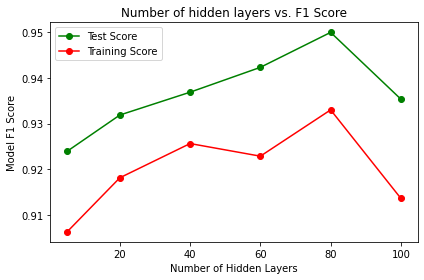

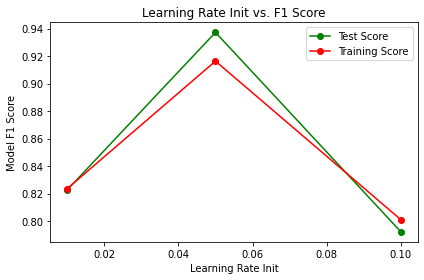

Best NN HypterParamters
{'hidden_layer_sizes': 80, 'learning_rate_init': 0.05}


In [11]:
plot_hidden_layers(X_train, y_train, X_test, y_test)
plot_learning_rate(X_train, y_train, X_test, y_test)
best_num_hl, best_lr = NNGridSearch(X_train, y_train)
best_nn = MLPClassifier(hidden_layer_sizes=(best_num_hl,),learning_rate_init=best_lr, random_state=10)

#### Learning Curve (Neural Network)

<module 'matplotlib.pyplot' from '/Users/chasebrooks/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

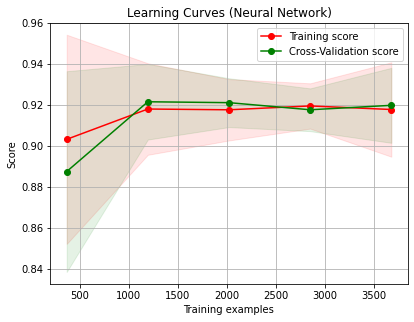

In [12]:
title = "Learning Curves (Neural Network)"
plot_learning_curve(best_nn, title, X, y, ylim=(0.7, 1.01))

#### Tuned model

In [13]:
nn_clf = best_nn.fit(X_train, y_train)

print("train score: ", nn_clf.score(X_train, y_train))
print("test score: ", nn_clf.score(X_test, y_test))

train score:  0.8815217391304347
test score:  0.8946796959826275


# Boosting (AdaBoost)

In [14]:
def BoostGridSearch(X_train, y_train):
    param_grid = {'n_estimators': np.linspace(10,100,3).round().astype('int'),
                  'learning_rate': np.linspace(.001,.1,3)}

    boost = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=param_grid, cv=5)
    boost.fit(X_train, y_train)
    print("Best Hyper Parameters")
    print(boost.best_params_)
    return boost.best_params_['n_estimators'], boost.best_params_['learning_rate']

def plot_num_estimators_boost(X_train, y_train, X_test, y_test):
    
    train_score = []
    test_score = []
    n_estimators = [1] + [i for i in range(50, 350, 50)]
    for num in n_estimators:         
        clf = AdaBoostClassifier(n_estimators=num, random_state=10)
        clf.fit(X_train, y_train)
        test_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)
        test_score.append(f1_score(y_test, test_pred))
        train_score.append(f1_score(y_train, train_pred))
      
    plt.plot(n_estimators, test_score, 'o-', color='g', label='Testing Score')
    plt.plot(n_estimators, train_score, 'o-', color = 'r', label='Training Score')
    plt.ylabel('Classification Score')
    plt.xlabel('No. Estimators')
    
    plt.title("Number of estimators vs. F1 Score")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def plot_learning_rate_boost(X_train, y_train, X_test, y_test):
    
    train_score = []
    test_score = []
    lr_range = np.linspace(.001,.1,3)
    for lr in lr_range:         
        clf = AdaBoostClassifier(learning_rate=lr, random_state=10)
        clf.fit(X_train, y_train)
        test_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)
        test_score.append(f1_score(y_test, test_pred))
        train_score.append(f1_score(y_train, train_pred))
      
    plt.plot(lr_range, test_score, 'o-', color='g', label='Testing Score')
    plt.plot(lr_range, train_score, 'o-', color = 'r', label='Training Score')
    plt.ylabel('Classification Score')
    plt.xlabel('Learning Rate')
    
    plt.title("Learning Rate vs. F1 Score")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

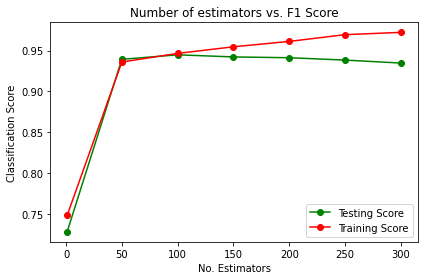

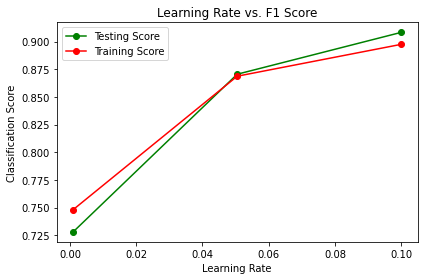

Best Hyper Parameters
{'learning_rate': 0.1, 'n_estimators': 100}


In [15]:
plot_num_estimators_boost(X_train, y_train, X_test, y_test)
plot_learning_rate_boost(X_train, y_train, X_test, y_test)
n_estimators, lr = BoostGridSearch(X_train, y_train)
best_Boost = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=lr, random_state=10)

#### Learning Curve

<module 'matplotlib.pyplot' from '/Users/chasebrooks/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

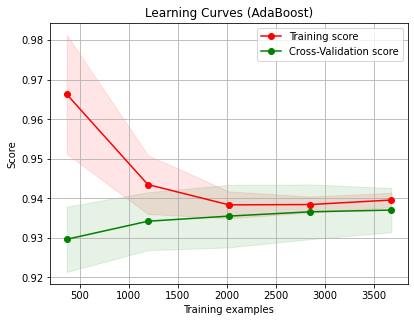

In [16]:
title = "Learning Curves (AdaBoost)"
plot_learning_curve(best_Boost, title, X, y, ylim=(0.7, 1.01))

#### Best Scores

In [17]:
boost_clf = best_Boost.fit(X_train, y_train)

print("train score: ", boost_clf.score(X_train, y_train))
print("test score: ", boost_clf.score(X_test, y_test))

train score:  0.9375
test score:  0.9467969598262758


# Support Vector Machine

#### Validation Curve 

#### HyperParamter Tuning
C (penalty Parameter) <br>
Gamma

In [18]:
# Source: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
def SVMGridSearch(X_train, y_train):
    Cs = [0.1, 1, 10, 100, 1000]
    gammas = [1, 0.1, 0.01, 0.001, 0.0001]
    param_grid = {'C': Cs,
                  'gamma': gammas}

    clf = GridSearchCV(estimator = svm.SVC(random_state=10), param_grid=param_grid, cv=5)
    clf.fit(X_train, y_train)
    print("Best SVM Paramters: ")
    print(clf.best_params_)
    return clf.best_params_['C'], clf.best_params_['gamma']

# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
def plot_gamma_SVM(X, y):
    param_range = np.logspace(-6, -1, 5)
    train_scores, test_scores = validation_curve(
        svm.SVC(),
        X,
        y,
        param_name="gamma",
        param_range=param_range,
        scoring="accuracy",
        n_jobs=2,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.title("Validation Curve (SVM)")
    plt.xlabel(r"$\gamma$")
    plt.ylabel("Score")
    lw = 2
    plt.semilogx(
        param_range, train_scores_mean, label="Training score", color="r", lw=lw
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="r",
        lw=lw,
    )
    plt.semilogx(
        param_range, test_scores_mean, label="Cross-validation score", color="g", lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="g",
        lw=lw,
    )
    plt.legend(loc="best")
    plt.show()
    
def plot_C_SVM(X_train, y_train, X_test, y_test):
    train_score = []
    test_score = []
    Cs = [0.1, 1] + [i for i in range(10,110,10)]
    for C in Cs:         
        clf = svm.SVC(C=C, random_state=10)
        clf.fit(X_train, y_train)
        test_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)
        test_score.append(f1_score(y_test, test_pred))
        train_score.append(f1_score(y_train, train_pred))
      
    plt.plot(Cs, test_score, 'o-', color='g', label='Testing Score')
    plt.plot(Cs, train_score, 'o-', color = 'r', label='Training Score')
    plt.ylabel('Classification Score')
    plt.xlabel('C')
    
    plt.title("C vs. F1 Score")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    


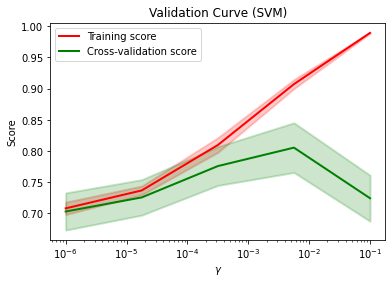

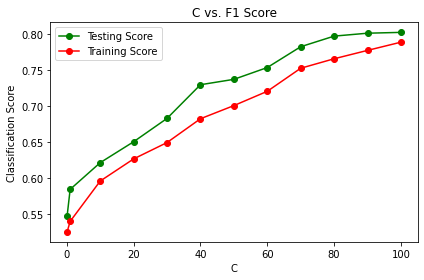

Best SVM Paramters: 
{'C': 1000, 'gamma': 0.0001}


In [19]:
plot_gamma_SVM(X, y)
plot_C_SVM(X_train, y_train, X_test, y_test)
C, gamma = SVMGridSearch(X_train, y_train)
best_SVM = svm.SVC(C=C, gamma=gamma, kernel='rbf', random_state=10)

#### Learning Curves

<module 'matplotlib.pyplot' from '/Users/chasebrooks/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

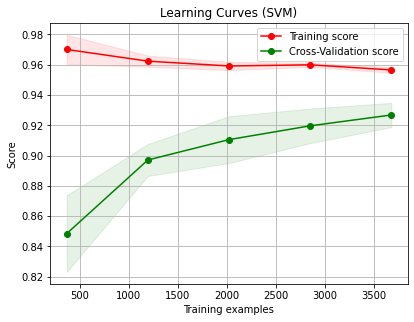

In [20]:
title = "Learning Curves (SVM)"
plot_learning_curve(best_SVM, title, X, y, ylim=(0.7, 1.01))

In [21]:
best_SVM.fit(X_train, y_train)
print("train score: ", best_SVM.score(X_train, y_train))
print("test score: ", best_SVM.score(X_test, y_test))

train score:  0.9565217391304348
test score:  0.9337676438653637


# K-Nearest Neighbors

#### Validation Curve for K-Nearest Neighbors => choose k=10

In [22]:
def KNNGridSearch(X_train, y_train):
    neighbors = [1] + [i for i in range(10,110,10)]
    param_grid = {"n_neighbors": neighbors}

    clf = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=param_grid, cv=5)
    clf.fit(X_train, y_train)
    print("Best KNN Paramters: ")
    print(clf.best_params_)
    return clf.best_params_['n_neighbors']


def plot_validation_curve_KNN(X_train, y_train, X_test, y_test):
    
    test_score = []
    train_score = []
    klist = np.arange(1,250,25).astype('int')
    for i in klist:
        clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
        clf.fit(X_train,y_train)
        test_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)
        test_score.append(f1_score(y_test, test_pred))
        train_score.append(f1_score(y_train, train_pred))

    
    plt.plot(klist, test_score, 'o-', color='r', label='Testing Score')
    plt.plot(klist, train_score, 'o-', color = 'g', label='Training score')
    plt.title('Validation curve for K-Nearest Neighbors')
    plt.xlabel('k = num neighbors')
    plt.ylabel("Classification score")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
 

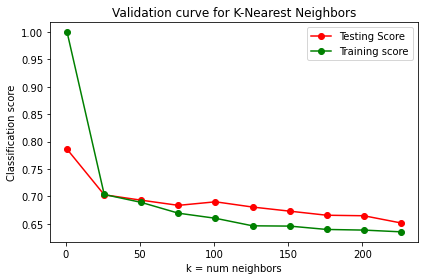

Best KNN Paramters: 
{'n_neighbors': 1}


In [23]:
plot_validation_curve_KNN(X_train, y_train, X_test, y_test)
best_n_neighbors = KNNGridSearch(X_train, y_train)
best_KNN = KNeighborsClassifier(n_neighbors=best_n_neighbors)

In [24]:
best_KNN.fit(X_train, y_train)
print("train score: ", best_KNN.score(X_train, y_train))
print("test score: ", best_KNN.score(X_test, y_test))

train score:  0.9994565217391305
test score:  0.8273615635179153


#### Learning Curves (KNN)

<module 'matplotlib.pyplot' from '/Users/chasebrooks/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

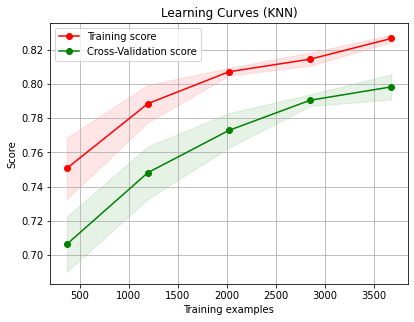

In [25]:
title = "Learning Curves (KNN)"
learner = KNeighborsClassifier(n_neighbors=10)

plot_learning_curve(learner, title, X, y, ylim=(0.7, 1.01))

## Model Comparison

#### Score Comparison

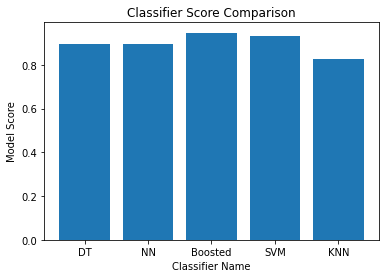

In [26]:
classifiers = ["DT", "NN", "Boosted", "SVM", "KNN"]
scores= [dt_clf.score(X_test, y_test),
         nn_clf.score(X_test, y_test), 
         boost_clf.score(X_test, y_test), 
         best_SVM.score(X_test, y_test), 
         best_KNN.score(X_test, y_test)]


plt.bar(classifiers,scores)
plt.title('Classifier Score Comparison')
plt.xlabel('Classifier Name')
plt.ylabel('Model Score')
plt.show()

#### Training Time

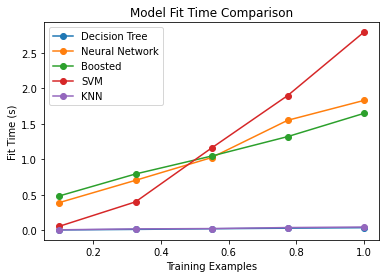

In [28]:
def plot_fit_times(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 5)):
    
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    _, _, _, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=4,
        train_sizes=train_sizes,
        return_times=True,
    )
    fit_times_mean = np.mean(fit_times, axis=1)
    
    return train_sizes, fit_times_mean

DT_train_sizes, DT_fit_times = plot_fit_times(dt_clf, X, y)
_, nn_fit_times = plot_fit_times(nn_clf, X, y)
_, boost_fit_times = plot_fit_times(boost_clf, X, y)
_, svm_fit_times = plot_fit_times(best_SVM, X, y)
_, knn_fit_times = plot_fit_times(best_KNN, X, y)


plt.plot(DT_train_sizes, DT_fit_times, 'o-', label='Decision Tree')
plt.plot(DT_train_sizes, nn_fit_times, 'o-', label='Neural Network')
plt.plot(DT_train_sizes, boost_fit_times, 'o-', label='Boosted')
plt.plot(DT_train_sizes, svm_fit_times, 'o-', label='SVM')
plt.plot(DT_train_sizes, knn_fit_times, 'o-', label='KNN')


plt.title('Model Fit Time Comparison')
plt.xlabel('Training Examples')
plt.ylabel("Fit Time (s)")
plt.legend(loc='best')
plt.show()